In [1]:
!pwd

/content


In [2]:
#changing the working directory and entering to dataset directory for my google drive
%cd drive/MyDrive/kaggle/image_classification/

/content/drive/MyDrive/kaggle/image_classification


In [3]:
%cd 10_monkey_species/

/content/drive/MyDrive/kaggle/image_classification/10_monkey_species


In [4]:
!ls

AccVal_acc.png	LossVal_loss.png  monkey_labels.txt  test  train


In [5]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.resnet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [7]:
train_path = 'train'
valid_path = 'test'

In [8]:
# add preprocessing layer to the front of ResNet50V2
resnet = ResNet50V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94683136/94668760 [==============================] - 1s 0us/step


In [9]:
# don't train existing weights
for layer in resnet.layers:
  layer.trainable = False

In [10]:
# useful for getting number of classes
folders = glob('train/*')

In [11]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [12]:
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [13]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1098 images belonging to 10 classes.


In [17]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 272 images belonging to 10 classes.


In [19]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
35/35 [==============================] - 458s 12s/step - loss: 3.9026 - accuracy: 0.7714 - val_loss: 1.5433 - val_accuracy: 0.9044
Epoch 2/5
35/35 [==============================] - 49s 1s/step - loss: 1.1608 - accuracy: 0.9444 - val_loss: 1.1282 - val_accuracy: 0.9412
Epoch 3/5
35/35 [==============================] - 48s 1s/step - loss: 0.3828 - accuracy: 0.9718 - val_loss: 1.3489 - val_accuracy: 0.9338
Epoch 4/5
35/35 [==============================] - 48s 1s/step - loss: 0.4008 - accuracy: 0.9781 - val_loss: 1.2007 - val_accuracy: 0.9596
Epoch 5/5
35/35 [==============================] - 49s 1s/step - loss: 0.1113 - accuracy: 0.9882 - val_loss: 0.9360 - val_accuracy: 0.9559


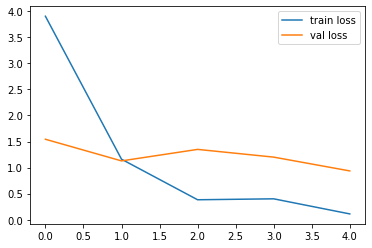

<Figure size 432x288 with 0 Axes>

In [20]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

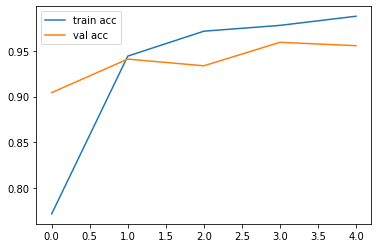

<Figure size 432x288 with 0 Axes>

In [21]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')